In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
!wget -O zombie_data.csv https://docs.google.com/spreadsheets/d/1n80MKN7eWNrhfpJA2L9McdWCfb6H18Pn7LA8uiZO0-U/export?format=csv

--2025-12-08 18:43:11--  https://docs.google.com/spreadsheets/d/1n80MKN7eWNrhfpJA2L9McdWCfb6H18Pn7LA8uiZO0-U/export?format=csv
Loaded CA certificate '/usr/ssl/certs/ca-bundle.crt'
Resolving docs.google.com (docs.google.com)... 142.250.67.78, 2404:6800:4002:806::200e
Connecting to docs.google.com (docs.google.com)|142.250.67.78|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-04-88-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/44t90lrmt7nfhr1om6287teoj4/1765199590000/101951693283634981502/*/1n80MKN7eWNrhfpJA2L9McdWCfb6H18Pn7LA8uiZO0-U?format=csv [following]
--2025-12-08 18:43:11--  https://doc-04-88-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/44t90lrmt7nfhr1om6287teoj4/1765199590000/101951693283634981502/*/1n80MKN7eWNrhfpJA2L9McdWCfb6H18Pn7LA8uiZO0-U?format=csv
Resolving doc-04-88-sheets.googleusercontent.com (doc-04-88-sheets.googleusercontent.com)... 142.251.43.161, 2404:6800:4002:803::2001
Conn

In [21]:
filename = "zombie_data.csv"
data_list=[]

In [22]:
with open(filename, 'r') as f:
  header = f.readline()
  for line in f:
    line = line.strip()
    if line:
      parts =line.split(',')
      row=[float(parts[0]), float(parts[1]), float(parts[2])]
      data_list.append(row)

data=np.array(data_list)
X_org=data[:,0:2]
y=data[:,2]

In [23]:
X_org[0]

array([12.,  0.])

In [24]:
y[0]

np.float64(0.0)

In [25]:
mu = np.mean(X_org, axis=0)
sigma = np.std(X_org, axis=0)
X_norm = (X_org - mu)/sigma

In [26]:
m=len(y)
X_b = np.c_[np.ones((m,1)), X_norm]

In [27]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [28]:
cost_track=[]
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))

    cost = -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1 - h))
    return cost

In [29]:
def train(X, y, alpha=0.1, iters=10000):
  theta = np.zeros(X.shape[1])
  m=len(y)
  for i in range(iters):
    z=np.dot(X, theta)
    h=sigmoid(z)
    error=h-y
    gradient=np.dot(X.T, error)/m
    theta -= alpha*gradient

    cost_track.append(compute_cost(theta, X, y))
  return theta

In [30]:
theta_final = train(X_b,y)

In [31]:
print(theta_final)

[1.97418657 9.39406895 6.7087632 ]


In [32]:
def predict(speed, ammo):
  features = np.array([speed, ammo])
  features_norm = (features-mu)/sigma
  features_final = np.r_[1, features_norm]
  prob= 1/(1+np.exp(-np.dot(features_final, theta_final)))

  return prob

In [33]:
result = predict(25, 1)
print(f"Survival Probability: {result}")

Survival Probability: 0.9999939040383341


In [34]:
predClass = 1 if result >= 0.5 else 0
if predClass ==1:
  print("The person survived.")
else:
  print("The person didnt survive.")

The person survived.


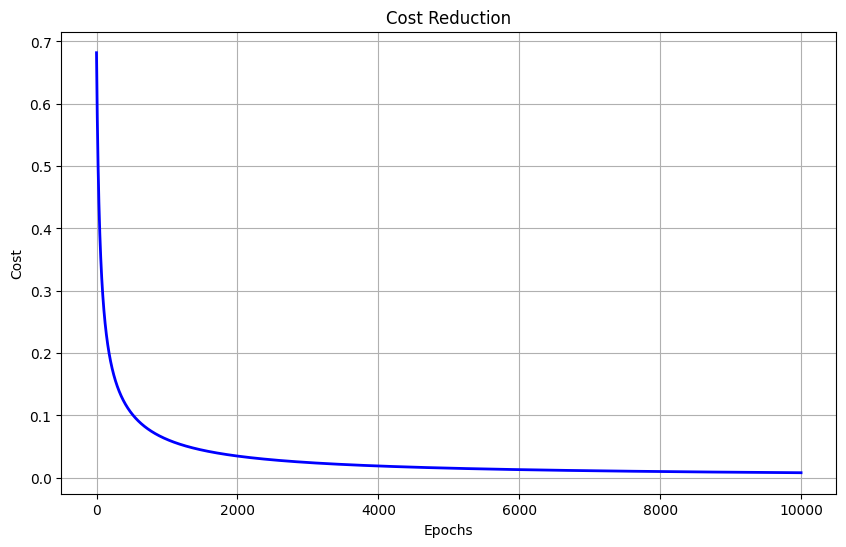

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_track)), cost_track, 'b-', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Reduction')
plt.grid(True)
plt.show()

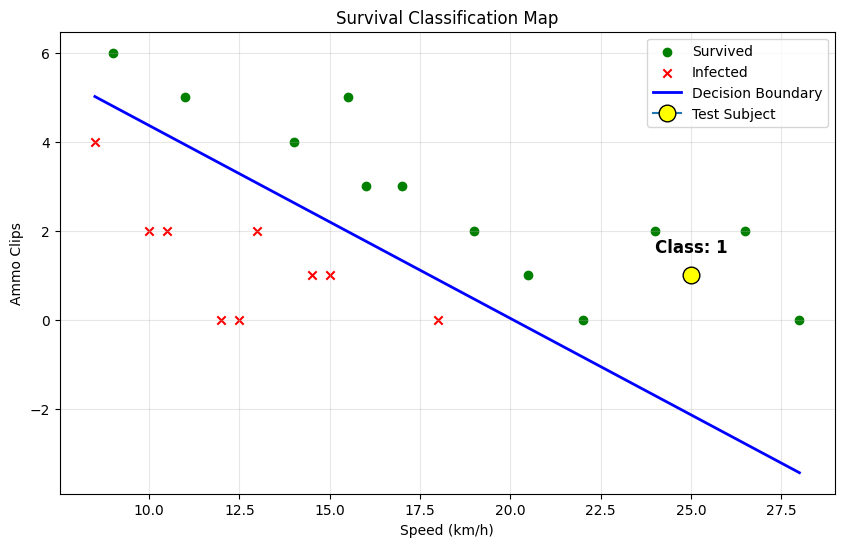

In [36]:
plt.figure(figsize=(10, 6))

survivors = X_org[y == 1]
infected = X_org[y == 0]
plt.scatter(survivors[:, 0], survivors[:, 1], c='green', marker='o', label='Survived')
plt.scatter(infected[:, 0], infected[:, 1], c='red', marker='x', label='Infected')

#decision boundary=> z= theta0 + theta1*x1 + theta2*x2 =0
#since sigmoid(z)=0.5 at z=0

x1_range = np.linspace(X_org[:, 0].min(), X_org[:, 0].max(), 100)

x1_norm = (x1_range - mu[0]) / sigma[0]

x2_norm = -(theta_final[0] + theta_final[1] * x1_norm) / theta_final[2]

x2_range = x2_norm * sigma[1] + mu[1]

plt.plot(x1_range, x2_range, 'b-', linewidth=2, label='Decision Boundary')

plt.plot(25, result, marker='o', markersize=12, markerfacecolor='yellow', markeredgecolor='black', label='Test Subject')
plt.text(25, 1.5, f"Class: {predClass}", ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Speed (km/h)')
plt.ylabel('Ammo Clips')
plt.title('Survival Classification Map')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()